In [1]:
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
raw_data = pd.read_csv('kc_house_data.csv')
df = raw_data.copy()
df.drop(['date'], axis=1, inplace=True)

21613
21613


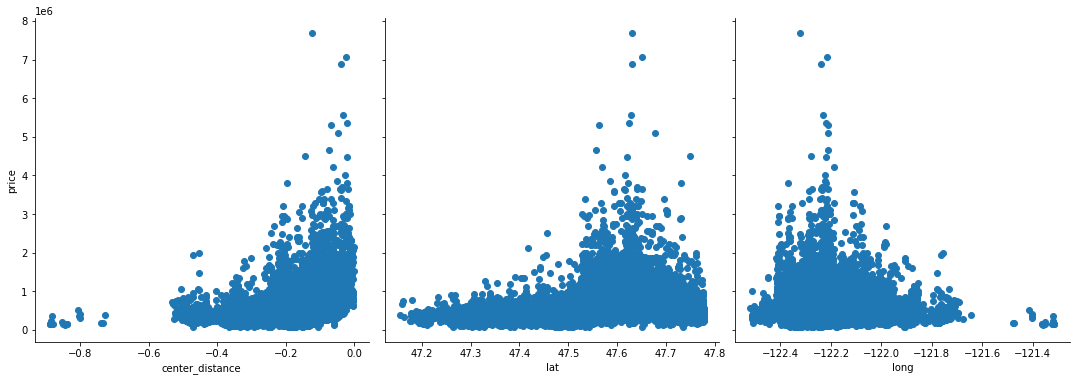

In [2]:
latSqrdList = [0]*len(df['lat'])
print(len(df['lat']))
latcenter = 47.63
longcenter = -122.2
for i in range(len(df['lat'])):
    latSqrdList[i] += (df.at[i, 'lat'] - latcenter) ** 2
    latSqrdList[i] += (df.at[i, 'long'] - longcenter) ** 2
    latSqrdList[i] = -(latSqrdList[i] ** 0.5)

print(len(latSqrdList))
df['center_distance'] = latSqrdList

df.head()

new = sns.PairGrid(df, x_vars=['center_distance', 'lat', 'long'], y_vars=[
                   'price'], height=5, aspect=1)
new.map(plt.scatter)
plt.show()
#plt.savefig("../figures/center-distance.png")

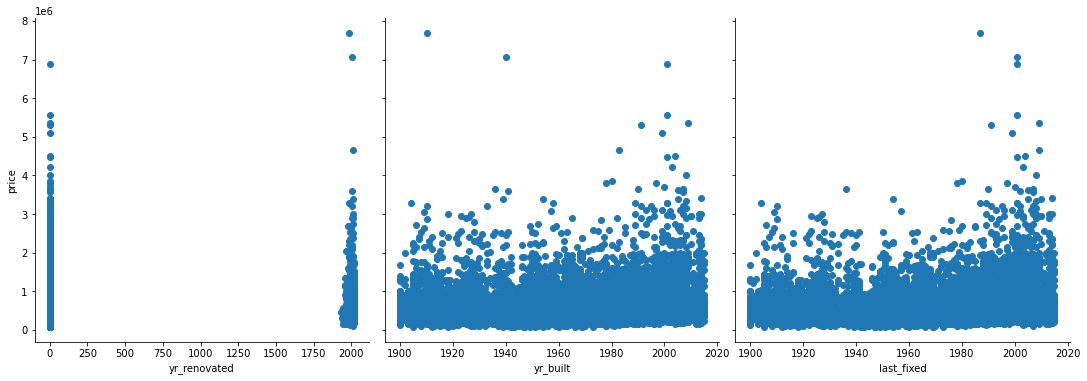

In [3]:

lastFixedList = [0]*len(df['yr_renovated'])
for i in range(len(df['yr_built'])):
    lastFixedList[i] = (max(df.at[i, 'yr_built'], df.at[i, 'yr_renovated']))

df['last_fixed'] = lastFixedList

df.head()

new=sns.PairGrid(df,x_vars=['yr_renovated', 'yr_built', 'last_fixed'], y_vars=['price'],height=5,aspect=1)
new.map(plt.scatter)
plt.show()

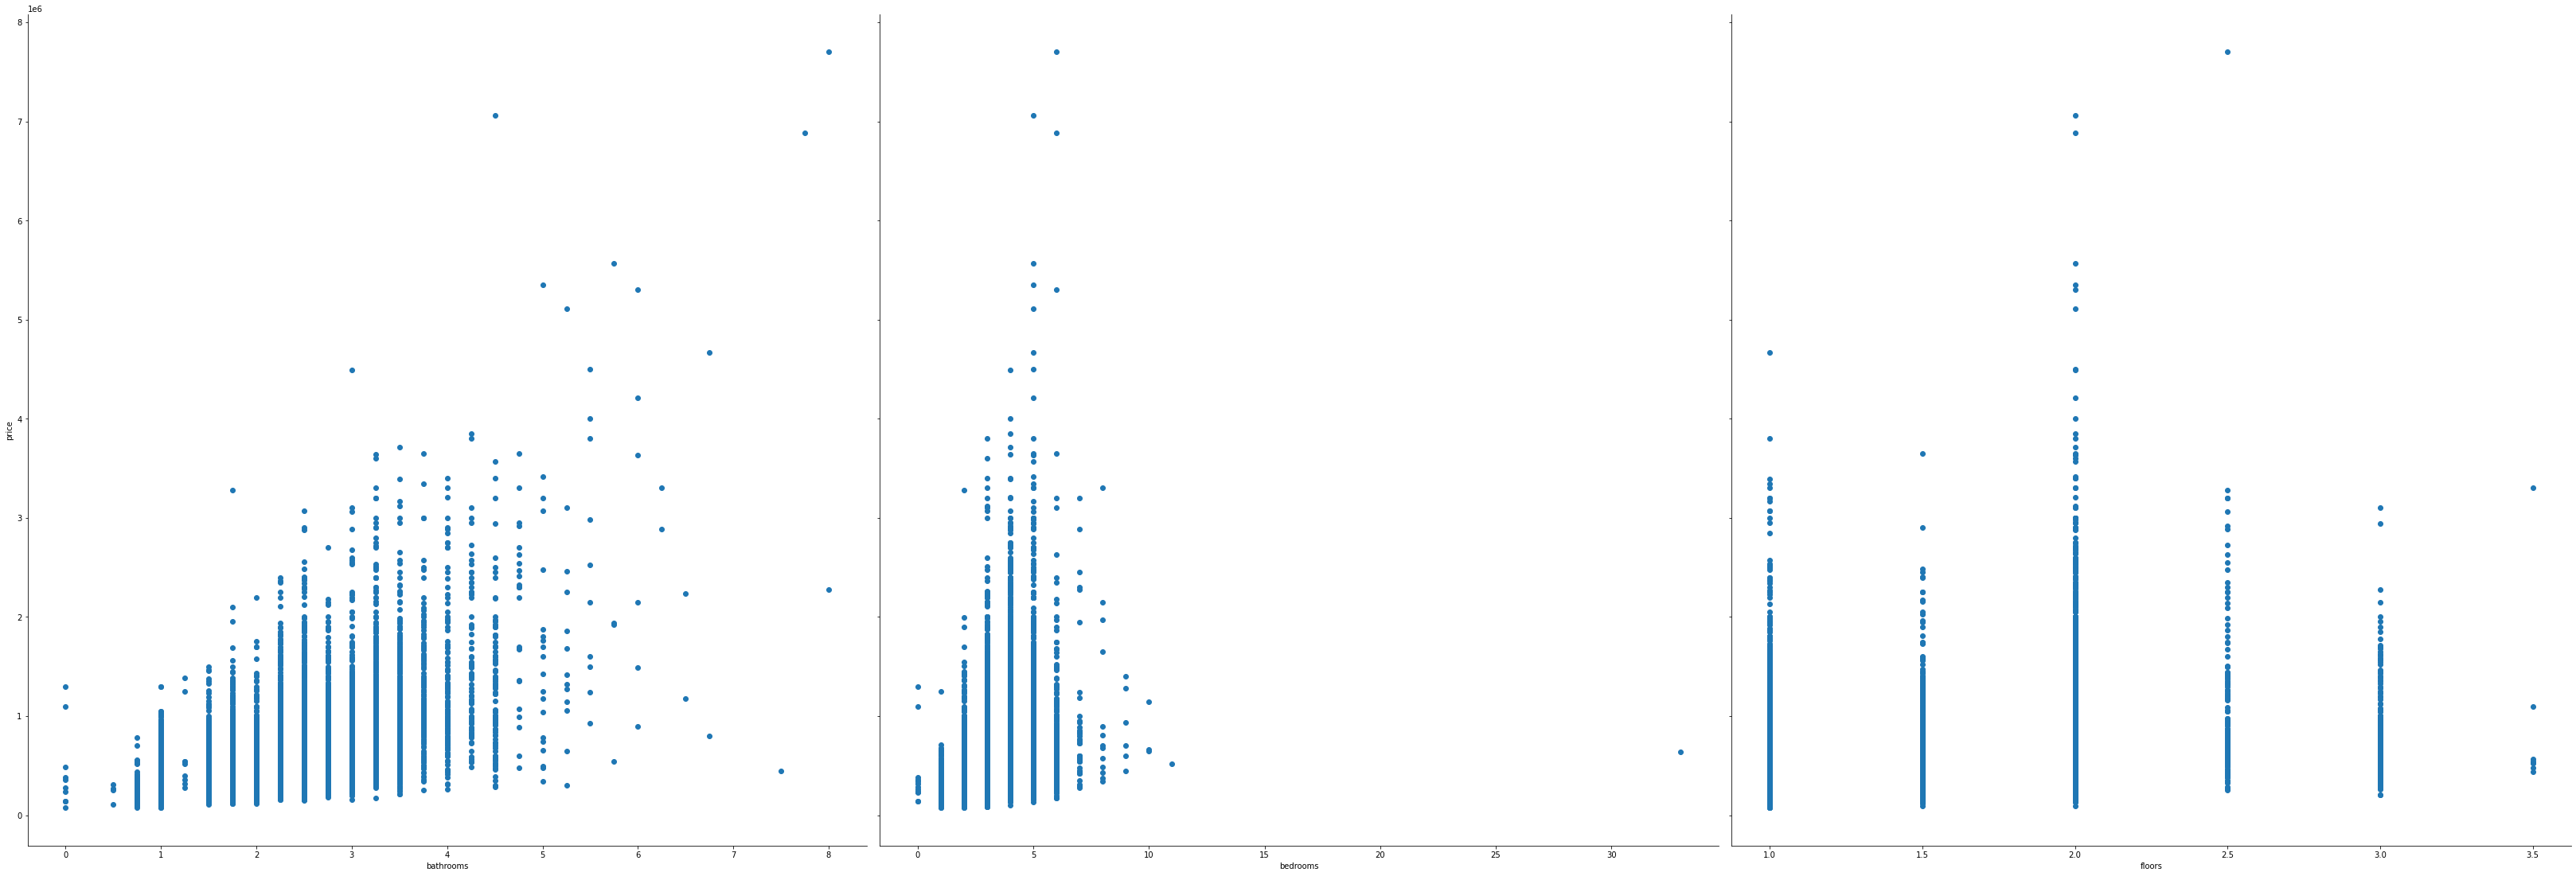

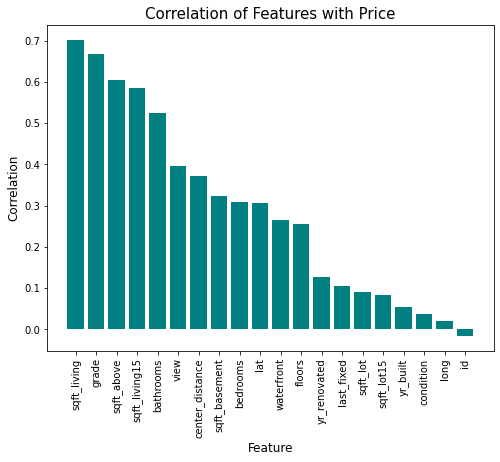

In [4]:
cor = df.corr()['price'].sort_values(
    ascending=False).drop(['price', 'zipcode'])
new = sns.PairGrid(df, x_vars=['bathrooms', 'bedrooms', 'floors'], y_vars=[
                   'price'], height=15, aspect=1)
new.map(plt.scatter)
plt.show()
plt.figure(figsize=(8, 6))
plt.bar(x=list(cor.index), height=list(cor.values), color='teal')
plt.xticks(rotation=90)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.title('Correlation of Features with Price', fontsize=15)
plt.show()

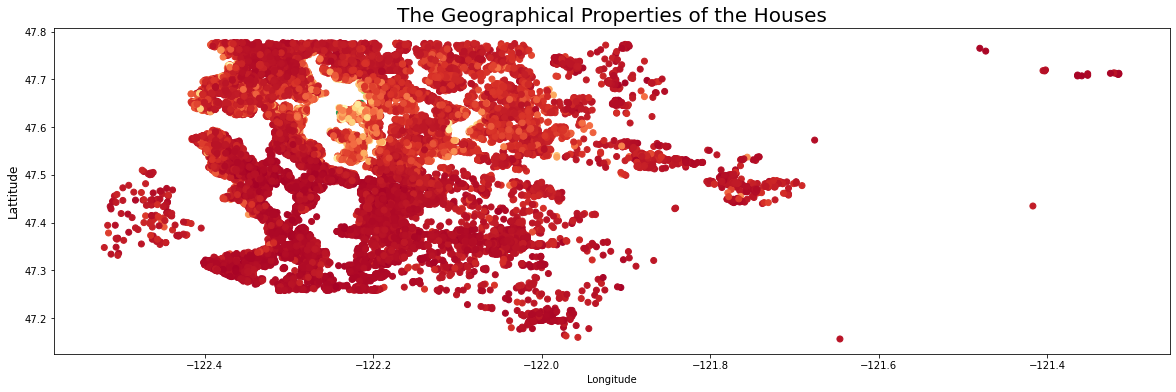

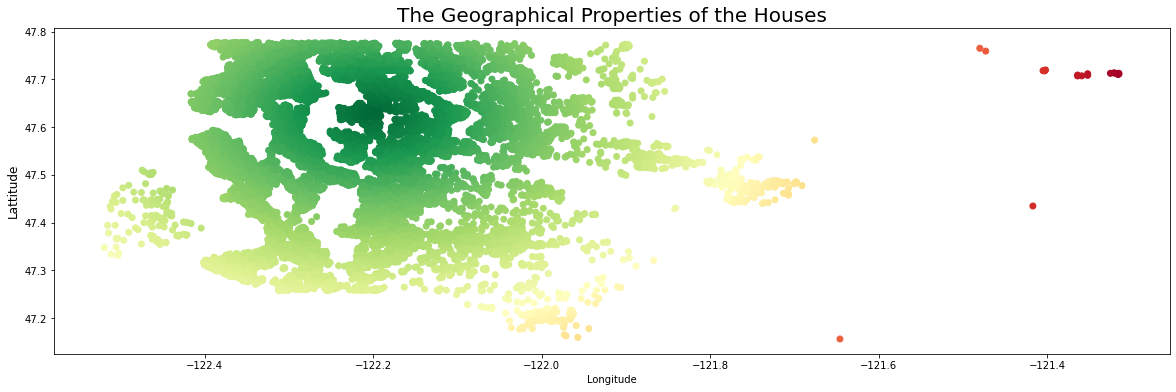

In [5]:
plt.figure(figsize=(20,6))
plt.scatter(x='long',y='lat',data=df, c='price',cmap='RdYlGn')
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Lattitude', fontsize=12)
plt.title('The Geographical Properties of the Houses', fontsize=20)
plt.show()

plt.figure(figsize=(20,6))
plt.scatter(x='long',y='lat',data=df, c='center_distance',cmap='RdYlGn')
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Lattitude', fontsize=12)
plt.title('The Geographical Properties of the Houses', fontsize=20)
plt.show()

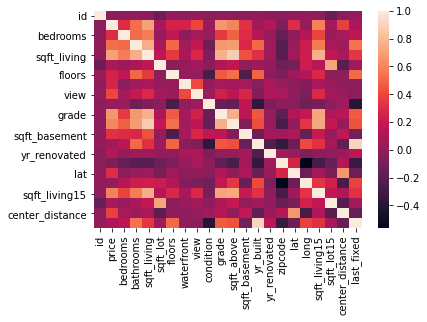

In [6]:
sns.heatmap(df.corr())
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
df['last_fixed'] = lastFixedList

print(data_scaled.mean(axis=0))
print(data_scaled.std(axis=0))
print(df.mean(axis=0))
print(df.std(axis=0))
        

[ 1.14407473e-16 -3.68207960e-17  2.36705117e-16 -1.78843866e-16
  2.41965231e-16  1.05202274e-17 -3.15606823e-17 -5.26011371e-18
 -1.05202274e-17 -2.57745572e-16  2.52485458e-16  1.10462388e-16
  6.83814783e-17  1.91468139e-15  1.31502843e-18 -8.96214887e-14
 -3.44626213e-14 -3.63684262e-14  8.15317626e-17 -2.89306254e-17
 -6.37788788e-17  8.41618194e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
id                 4.580302e+09
price              5.400881e+05
bedrooms           3.370842e+00
bathrooms          2.114757e+00
sqft_living        2.079900e+03
sqft_lot           1.510697e+04
floors             1.494309e+00
waterfront         7.541757e-03
view               2.343034e-01
condition          3.409430e+00
grade              7.656873e+00
sqft_above         1.788391e+03
sqft_basement      2.915090e+02
yr_built           1.971005e+03
yr_renovated       8.440226e+01
zipcode            9.807794e+04
lat                4.756005e+01
long              -1.222139e+

In [8]:
"""x_var = []
y_var = []
means = {}
stds = {}
for e in df.keys():
    means[e] = df.mean(axis=0)[e]
    stds[e] = df.std(axis=0)[e]
for i in range(len(df['id'])):
#for i in range(100):
    tempList = []
    for e in df.keys():
        if(e == 'price'):
            y_var.append(df[e][i])
        else:
            tempList.append((df[e][i] - means[e]) / stds[e])
    x_var.append(tempList)
theta = [1] * len(x_var[0]) """

"x_var = []\ny_var = []\nmeans = {}\nstds = {}\nfor e in df.keys():\n    means[e] = df.mean(axis=0)[e]\n    stds[e] = df.std(axis=0)[e]\nfor i in range(len(df['id'])):\n#for i in range(100):\n    tempList = []\n    for e in df.keys():\n        if(e == 'price'):\n            y_var.append(df[e][i])\n        else:\n            tempList.append((df[e][i] - means[e]) / stds[e])\n    x_var.append(tempList)\ntheta = [1] * len(x_var[0]) "

# Decision Tree 

In [9]:
# Decision tree

# Copy dataset
dataset = raw_data.copy()

# Combine features
dataset['center_distance'] = latSqrdList
dataset['last_fixed'] = lastFixedList

# Drop combined and useless columns
dataset.drop(['id', 'date', 'yr_renovated', 'yr_built', 'lat', 'long'],axis=1, inplace=True)



In [10]:
# Remove outliers
from scipy import stats
#dataset[(np.abs(stats.zscore(dataset)) < 3).all(axis=1)]

In [11]:
# from sklearn.preprocessing import StandardScaler
# Normalize values
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset)
#scaled_reverse = scaler.inverse_transform(dataset)
#df_scaled_reverse = pd.DataFrame(scaled_reverse, columns=dataset.columns)
df_norm = pd.DataFrame(dataset_scaled, columns=dataset.columns)
# Check if data is normalized
#print(df_norm.head)
#print(df_norm.mean(axis=0))
#print(df_norm.std(axis=0))
#print(df_norm.mean(axis=0))
#print(df_norm.std(axis=0))

X = dataset.iloc[:,1:] # Splice dataframe: All items along 0-axis (values) 
# and all attributes along 1-axis, except index 1, which is price
Y = dataset.iloc[:,0] # All values along 0-axis and, but only the price column
X_scaler = scaler.fit_transform(X)
X_norm = pd.DataFrame(X_scaler, columns=X.columns)
#Y_scaler = scaler.fit_transform(Y)

# Split data into training data and test data
X_training, X_test, Y_training, Y_test = train_test_split(X_norm,Y, test_size=0.2, random_state=0)

In [12]:
#print(dataset.iloc[:,1:])
#print(dataset.iloc[:,0:2])
# kombinere størst av yr_year_fixed lst_fixed
# 

### Hyperparameter tuning with GridSearchCV

In [13]:
#from sklearn.metrics import mean_squared_error
#def root_mean_squared_error(y_true, y_pred):
#    ''' Root mean squared error regression loss
#    
#    Parameters
#    ----------
#    y_true : array-like of shape = (n_samples) or (n_samples, n_outputs)
#    Ground truth (correct) target values.
#
#    y_pred : array-like of shape = (n_samples) or (n_samples, n_outputs)
#    Estimated target values.
#    '''
    #return np.sqrt(mean_squared_error(y_true, y_pred))

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import tree

#from sklearn.metrics import make_scorer

#rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)

#pipe_tree = make_pipeline(tree.DecisionTreeRegressor(random_state=1))

depths = np.arange(1, 21)
num_leafs = [1, 5, 10, 20, 50, 100]
dt = tree.DecisionTreeRegressor()


param_grid = {
    "min_samples_split": [10, 20, 40],
    "max_depth": depths,
    "min_samples_leaf": num_leafs
}
#print(dt.get_params())

grid_cv_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
#print(X_training.iloc[1:,:])
#print(Y_training.iloc[1:,:])
grid_cv_dt.fit(X_training, Y_training)
print(grid_cv_dt.best_params_)
print(grid_cv_dt.best_score_)

dt_best_model = grid_cv_dt.best_estimator_
#my_model.fit(X_train_and_validate, y_train_and_validate)

{'max_depth': 14, 'min_samples_leaf': 10, 'min_samples_split': 20}
0.7458618192092233


In [15]:
## Train
from sklearn.metrics import explained_variance_score

dt_unoptimized = tree.DecisionTreeRegressor()

# Train decision tree model
dt_best_model.fit(X_training, Y_training)
dt_unoptimized.fit(X_training, Y_training)

score_train = dt_best_model.score(X_training, Y_training)
score_test = dt_best_model.score(X_test, Y_test) #Return the coefficient of determination R^2 of the prediction.

score_train_default = dt_unoptimized.score(X_training, Y_training)
score_test_default = dt_unoptimized.score(X_test, Y_test) #Return the coefficient of determination R^2 of the prediction.

dt_predict = dt_best_model.predict(X_test)
dt_predict_untuned = dt_unoptimized.predict(X_test)
dt_mean_error_unoptimized =  (abs(dt_predict_untuned - Y_test) / len(Y_test)).sum()
dt_mean_error =  (abs(dt_predict - Y_test) / len(Y_test)).sum()
dt_mean_squared_error =  (abs(dt_predict - Y_test)**2 / len(Y_test)).sum()
print("Training score default model: " + str(score_train_default))
print("Testing score default model: " + str(score_test_default))

print("Training score: " + str(score_train))
print("Testing score: " + str(score_test))

print("Decision tree unoptimised: {}".format(dt_mean_error_unoptimized))
print("Decision tree mean error: {}".format(dt_mean_error))
print("Decision tree mean sqaured error: {}".format(dt_mean_squared_error))



Training score default model: 0.9992510888703682
Testing score default model: 0.7206895156912332
Training score: 0.87512418393696
Testing score: 0.7745211241042329
Decision tree unoptimised: 104968.08662965534
Decision tree mean error: 93949.285450032
Decision tree mean sqaured error: 26814910557.73384


## SkLearn Linear Regression

In [16]:
# Predict Test set
Y_predict = dt_best_model.predict(X_test) # Predict class or regression value for X.
explain = explained_variance_score(Y_predict, Y_test)
print("Explained variance score {}".format(explain))


#Y_pred_inverse_norm = scaler.inverse_transform(Y_predict)
#df_scaled_reverse = pd.DataFrame(scaled_reverse, columns=dataset.columns)
mean_error =  (abs(Y_predict - Y_test) / len(Y_test)).sum()

mean_correct_percent = ((Y_predict/Y_test)).sum() / len(Y_test)

print("Mean error: {}".format(mean_error))
print("Mean correctness: {}".format(mean_correct_percent))
#pred_tr = tr_regressor.predict(X_test)
#decision_score=tr_regressor.score(X_test,y_test)
#expl_tr = explained_variance_score(pred_tr,y_test)
#df.columns
#df.values

Explained variance score 0.7713278279204057
Mean error: 93949.285450032
Mean correctness: 1.0440532607212236


In [17]:
#fig, ax = plt.subplots(figsize=(50, 24))
#tree.plot_tree(dt)
#plt.savefig('tree_high_dpi')

In [18]:
# SkLearn Linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_training, Y_training)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
#print(y_pred)
#print(explained_variance_score(y_pred, Y_test))

regressor.score(X_test, Y_test)
error_lin =  (abs(y_pred - Y_test)**2 / len(Y_test)).sum()
print(error_lin)

linear_explained_var = explained_variance_score(y_pred, Y_test)
print(linear_explained_var)

    

36888384867.873436
0.5918746944505271
